In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [33]:
img = Image.open('20241117_174356.png')
img.size

(710, 1611)

In [34]:
width, height = img.size
single_height = height // 4

front_camera = img.crop((0, 0, width, single_height))
right_camera = img.crop((0, single_height, width, single_height * 2))
left_camera = img.crop((0, single_height * 2, width, single_height * 3))
rear_camera = img.crop((0, single_height * 3, width, height))

In [35]:
front_img = np.array(front_camera)

In [36]:
front_img.shape

(402, 710, 3)

In [37]:
DIM = (front_img.shape[1], front_img.shape[0])  # Image dimensions
K = np.array([[700, 0, DIM[0] / 2],
              [0, 700, DIM[1] / 2],
              [0, 0, 1]])  # Camera matrix
D = np.array([-0.2, 0.1, 0, 0])  # Distortion coefficients

In [42]:
map1, map2 = cv2.fisheye.initUndistortRectifyMap(K, D, np.eye(3), K, DIM, cv2.CV_16SC2)
undistorted_img = cv2.remap(front_img, map1, map2, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)

(402, 710, 3)

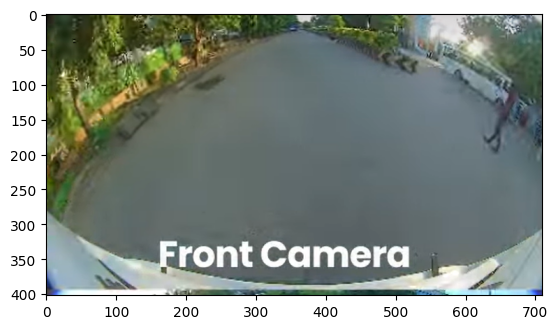

In [43]:
plt.imshow(front_img)
front_img.shape

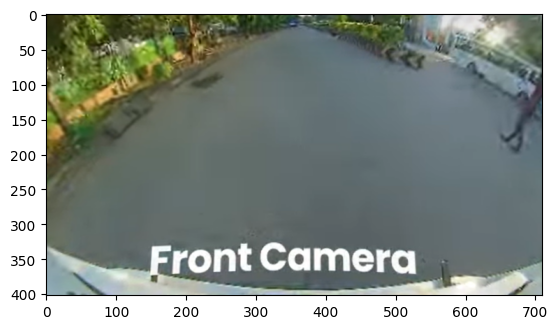

In [44]:
plt.imshow(undistorted_img)

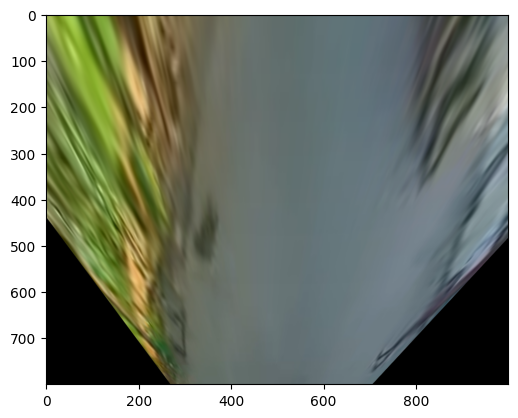

In [48]:
# Update source points as per the user's request
src_points = np.float32([[250, 50], [410, 50], [50, 220], [700, 220]])
dst_points = np.float32([[300, 0], [700, 0], [300, 800], [700, 800]])


# Recalculate the perspective transform matrix and apply it
matrix = cv2.getPerspectiveTransform(src_points, dst_points)
bird_eye_view_updated = cv2.warpPerspective(undistorted_img, matrix, (1000, 800))

plt.imshow(bird_eye_view_updated)

In [49]:
print(matrix)

[[ 2.51851852e+01  8.40740741e+01 -7.47777778e+03]
 [ 0.00000000e+00  1.92592593e+02 -9.62962963e+03]
 [-0.00000000e+00  1.81481481e-01  1.00000000e+00]]
